Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import sys
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor
import IPBasicPRM
import IPVISBasicPRM
import IPVisibilityPRM
import IPVISVisibilityPRM

import IPKClosestPRM # for visualization IKVISBasicPRM is used

#import IPLazyPRM
#import IPVISLazyPRM

import IPRRT
import IPRRTSimple
#import IPVISRRT

import IPAStar
import IPVISAStar

Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 5
basicConfig["numNodes"] = 300
plannerFactory["basePRM"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

basicConfig2 = dict()
basicConfig2["radius"] = 3
basicConfig2["numNodes"] = 300
#plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig2, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize]

kClosestConfig = dict()
kClosestConfig["k"] = 3
kClosestConfig["numNodes"] = 300
plannerFactory["kClosestPRM"] = [IPKClosestPRM.KClosestPRM, kClosestConfig, IPVISBasicPRM.basicPRMVisualize]

# lazyConfig = dict()
# lazyConfig["initialRoadmapSize"] = 5 
# lazyConfig["updateRoadmapSize"]  = 5 
# lazyConfig["kNearest"] = 5 
# plannerFactory["lazyPRM"] = [IPLazyPRM.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

astarConfig = dict()
astarConfig["heuristic"] = 'euclidean' 
astarConfig["w"]  = 0.5
#plannerFactory["astar"] = [IPAStar.AStar, astarConfig, IPVISAStar.aStarVisualize]

rrtConfig = dict()
rrtConfig["numberOfGeneratedNodes"] = 300 
rrtConfig["testGoalAfterNumberOfNodes"]  = 10
plannerFactory["RRT"] = [IPRRT.RRT, rrtConfig, IPVISBasicPRM.basicPRMVisualize]

rrtSimpleConfig = dict()
rrtSimpleConfig["numberOfGeneratedNodes"] = 300 
rrtSimpleConfig["testGoalAfterNumberOfNodes"]  = 10
plannerFactory["simpleRRT"] = [IPRRTSimple.RRTSimple, rrtSimpleConfig, IPVISBasicPRM.basicPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'E:\\HS Karlsruhe\\Masters\\Semester 1\\Roboterprogrammierung\\RP-Exam\\RoboterProgrammierungExam\\IPTestSuite.py'>

In [7]:
for benchmark in IPTestSuite.benchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
Entrance
Entrances
KIT
Inside
SSL
Ring
Hemispheres
Hammerhead
Zigzag
Spiral
medium
medium2
L-square
Teeth
Gearshift
Squares_easy
Zigzag_medium
Zigzag_hard
Japan
Haystack
HairPerson


In [8]:
resultList = list()

for key,producer in list(plannerFactory.items()):
    print(key, producer)
    for benchmark in IPTestSuite.benchList[0:3]:
        print ("Planning: " + key + " - " + benchmark.name)
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        #try:
            
        resultList.append(ResultCollection(key,
                                           planner, 
                                           benchmark, 
                                           planner.planPath(benchmark.startList,benchmark.goalList,producer[1]),
                                           IPPerfMonitor.dataFrame()
                                          ),
                        )
        #except Exception as e:
        #    throw e
        #    print ("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR ")
        #    pass
            



basePRM [<class 'IPBasicPRM.BasicPRM'>, {'radius': 5, 'numNodes': 300}, <function basicPRMVisualize at 0x0000025212FD0D30>]
Planning: basePRM - Trap
Planning: basePRM - Bottleneck
Planning: basePRM - Fat bottleneck
visibilityPRM [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x0000025224541670>]
Planning: visibilityPRM - Trap
Planning: visibilityPRM - Bottleneck
Planning: visibilityPRM - Fat bottleneck
kClosestPRM [<class 'IPKClosestPRM.KClosestPRM'>, {'k': 3, 'numNodes': 300}, <function basicPRMVisualize at 0x0000025212FD0D30>]
Planning: kClosestPRM - Trap
Planning: kClosestPRM - Bottleneck
Planning: kClosestPRM - Fat bottleneck
RRT [<class 'IPRRT.RRT'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x0000025212FD0D30>]
Planning: RRT - Trap
Planning: RRT - Bottleneck
Planning: RRT - Fat bottleneck
simpleRRT [<class 'IPRRTSimple.RRTSimple'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfN

In [9]:
print(plannerFactory.items())

dict_items([('basePRM', [<class 'IPBasicPRM.BasicPRM'>, {'radius': 5, 'numNodes': 300}, <function basicPRMVisualize at 0x0000025212FD0D30>]), ('visibilityPRM', [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x0000025224541670>]), ('kClosestPRM', [<class 'IPKClosestPRM.KClosestPRM'>, {'k': 3, 'numNodes': 300}, <function basicPRMVisualize at 0x0000025212FD0D30>]), ('RRT', [<class 'IPRRT.RRT'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x0000025212FD0D30>]), ('simpleRRT', [<class 'IPRRTSimple.RRTSimple'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x0000025212FD0D30>])])


D:\Program Files\Python39\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


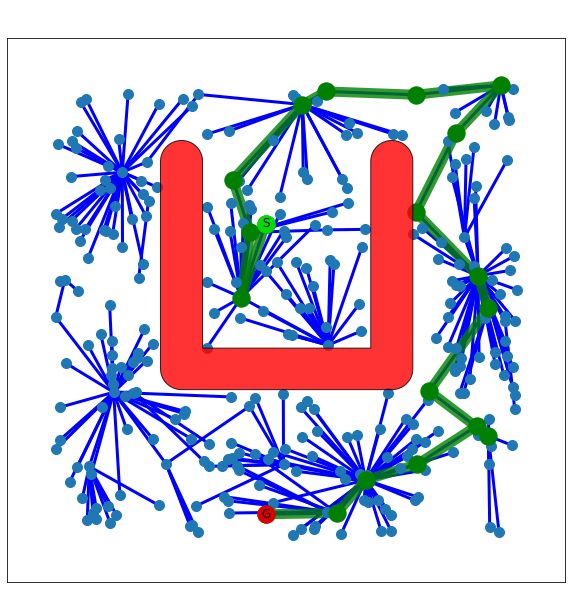

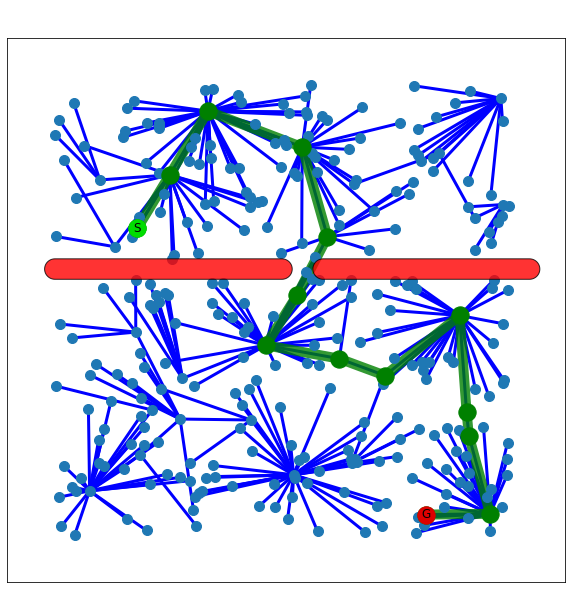

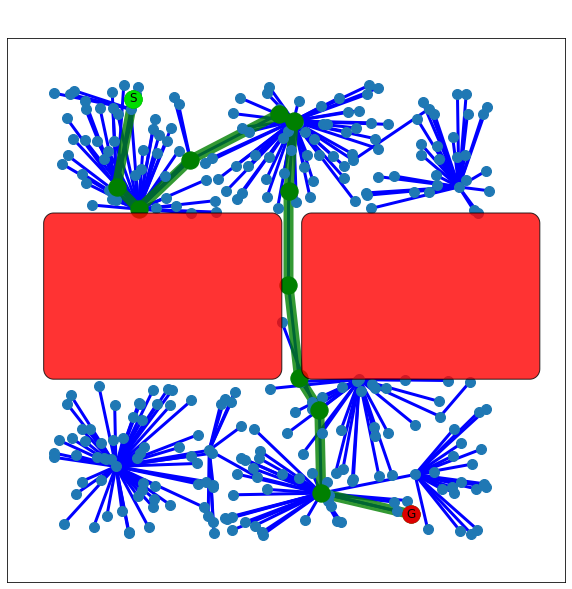

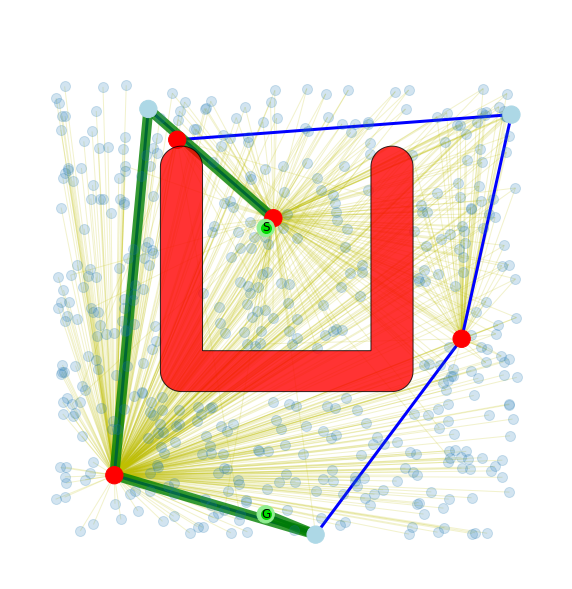

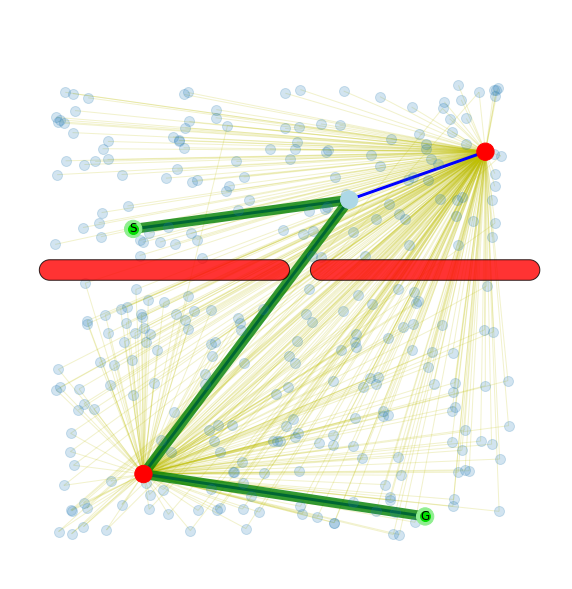

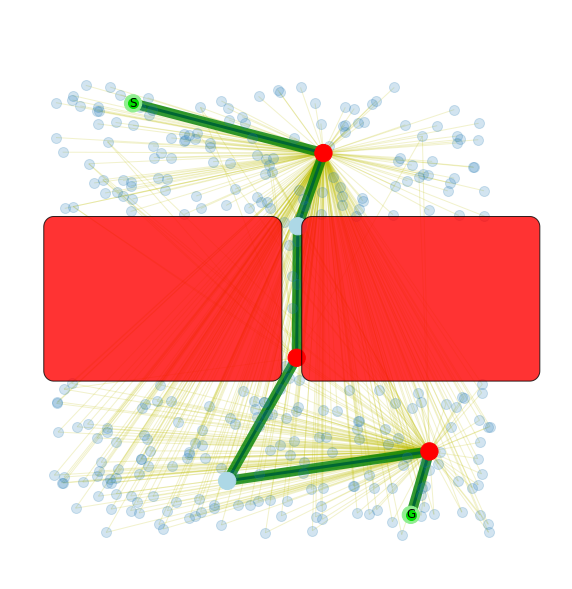

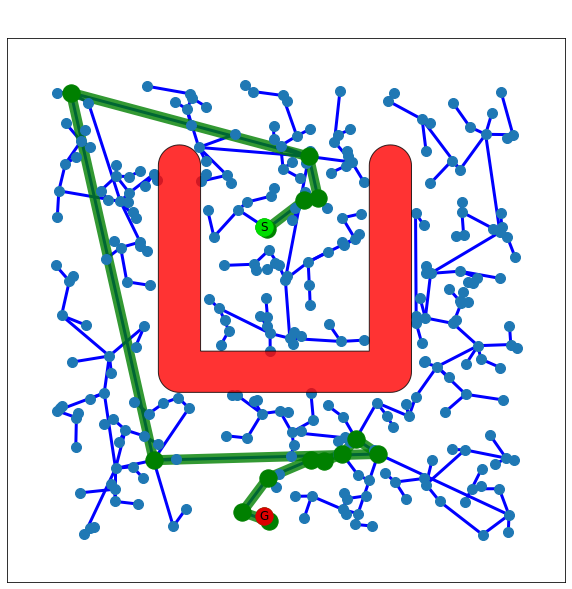

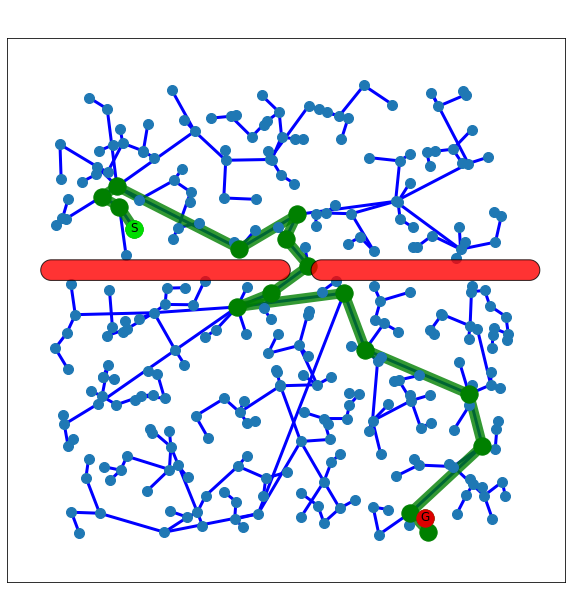

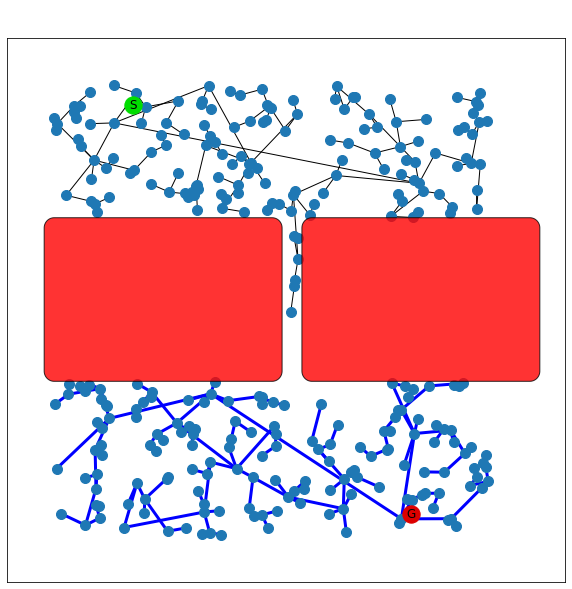

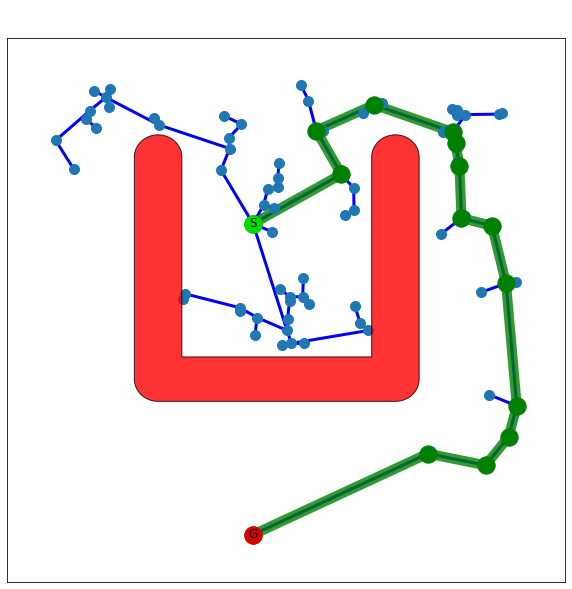

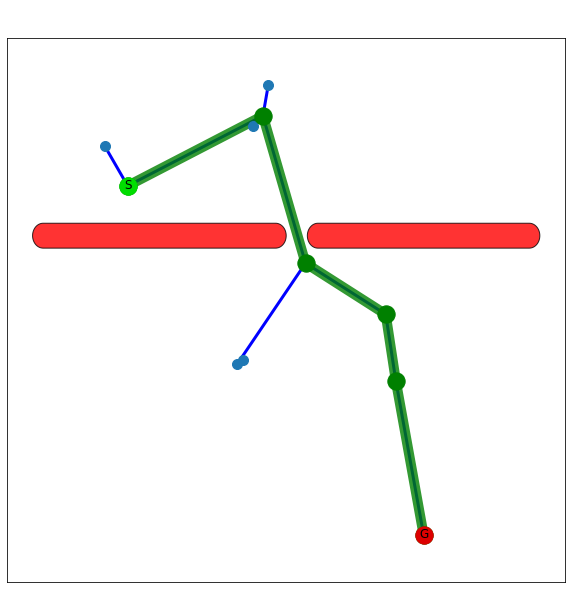

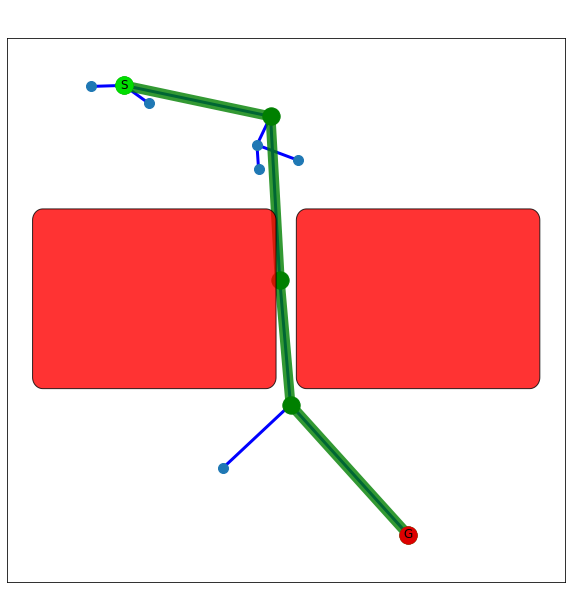

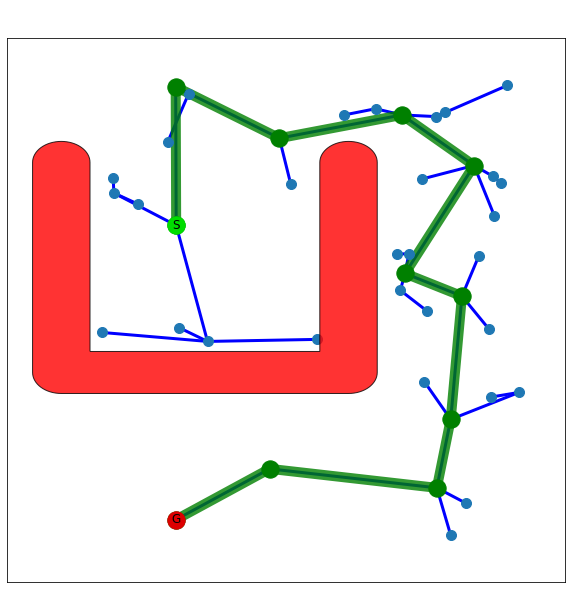

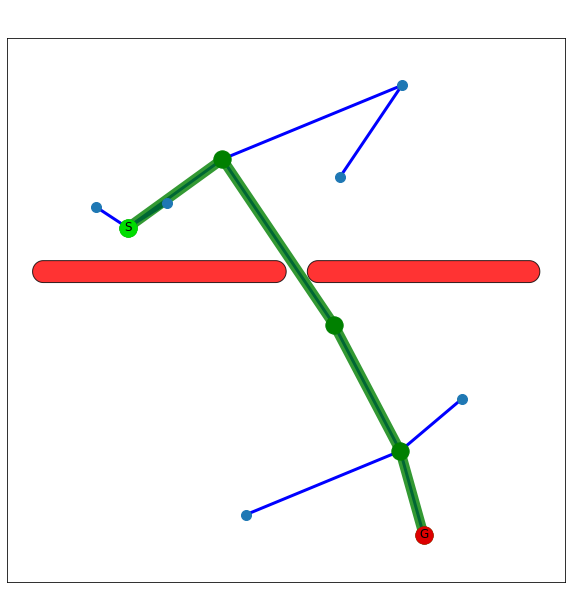

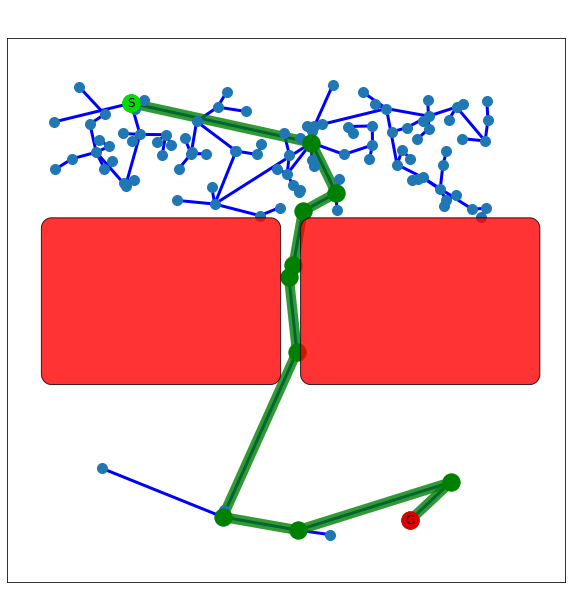

In [10]:
import matplotlib.pyplot as plt

for result in resultList:
    
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title, color='w')
    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
    except:
        pass
    

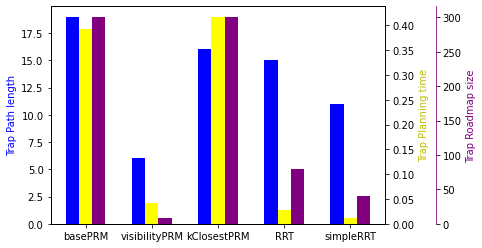

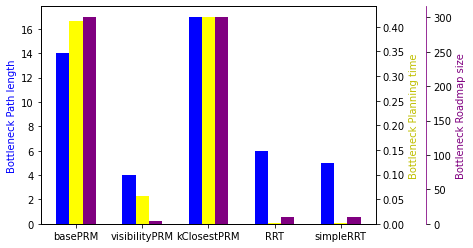

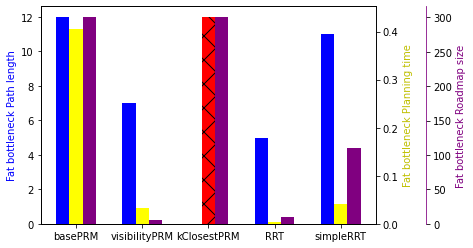

In [11]:
import numpy as np
for bench in IPTestSuite.benchList[0:3]:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    for result in resultList:
        if result.benchmark.name == bench.name:
            #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
            pathLength[result.plannerFactoryName] = len(result.solution)
            planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum()["time"]["planPath"]
            roadmapSize[result.plannerFactoryName] = result.planner.graph.size()
    
    fig, ax = plt.subplots()
    
    width = 0.2
    
    ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
    ax.set_ylabel(title + " Path length", color="blue")
    ax.set_xticks(np.arange(len(pathLength.keys())) + width)
    ax.set_xticklabels(pathLength.keys())

    ax2 = ax.twinx()
    bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
    ax2.set_ylabel(title + " Planning time", color="y")

    # Add coloring and patterns on axis two
    hatches = ['x' if length==0 else '' for length in pathLength.values()]
    color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
    for i,thisbar in enumerate(bar.patches):
        thisbar.set_facecolor(color[i])
        thisbar.set_hatch(hatches[i])

    # Multiple axes 
    ax3 = ax.twinx()
    ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
    ax3.set_ylabel(title + " Roadmap size",  color="purple")
    ax3.spines['right'].set_position(('axes', 1.15))
    ax3.spines['right'].set_color("purple")
    

    
        
    

In [12]:
result.perfDataFrame.groupby(["name"]).sum()["time"]

name
_getRandomFreePosition    0.010002
lineInCollision           0.007999
planPath                  0.041001
pointInCollision          0.009002
Name: time, dtype: float64

Step: 1
total steps: 1
n step: 1
n: 0
k: 3
basePRM
k_prev: 3
Centered: 7
k_next: 71
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
basePRM
k_prev: 12
Centered: 7
k_next: 82
new path creation, new path: ['start', 3, 12, 82, 71, 134, 61, 4, 15, 141, 14, 31, 16, 6, 9, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
basePRM
k_prev: 12
Centered: 134
k_next: 15
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
basePRM
k_prev: 82
Centered: 134
k_next: 4
new path creation, new path: ['start', 3, 12, 82, 4, 15, 141, 14, 31, 16, 6, 9, 'goal']
total steps: 5
n step: 1
n: 2
k: 3
basePRM
k_prev: start
Centered: 82
k_next: 141
Line collides, No change
total steps: 6
n step: 2
n: 2
k: 2
basePRM
k_prev: 3
Centered: 82
k_next: 15
Line collides, No change
total steps: 7
n step: 3
n: 2
k: 1
basePRM
k_prev: 12
Centered: 82
k_next: 4
Line collides, No change
DelTree centered on list item 3, node: 82
DelTree line collides
Adding nodes: 363 and 375
deleting center node: 82
DelTree successfu

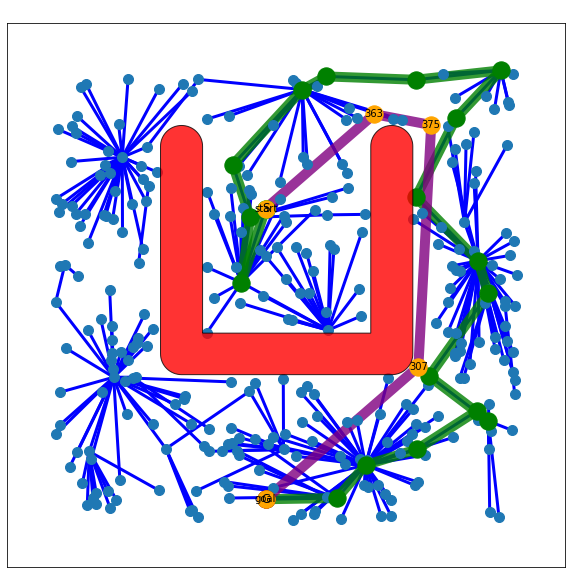

Step: 2
total steps: 1
n step: 1
n: 0
k: 3
basePRM
k_prev: start
Centered: 5
k_next: 123
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
basePRM
k_prev: start
Centered: 5
k_next: 10
new path creation, new path: ['start', 10, 123, 7, 14, 18, 1, 15, 23, 11, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
basePRM
k_prev: 18
Centered: 23
k_next: goal
new path creation, new path: ['start', 10, 123, 7, 14, 18, 'goal']
total steps: 4
n step: 1
n: 2
k: 3
basePRM
k_prev: start
Centered: 123
k_next: 18
Line collides, No change
total steps: 5
n step: 2
n: 2
k: 2
basePRM
k_prev: start
Centered: 123
k_next: 14
Line collides, No change
total steps: 6
n step: 3
n: 2
k: 1
basePRM
k_prev: 10
Centered: 123
k_next: 7
new path creation, new path: ['start', 10, 7, 14, 18, 'goal']
total steps: 7
n step: 1
n: 3
k: 3
basePRM
k_prev: start
Centered: 14
k_next: goal
Line collides, No change
total steps: 8
n step: 2
n: 3
k: 2
basePRM
k_prev: 10
Centered: 14
k_next: goal
Line collides, No change
total step

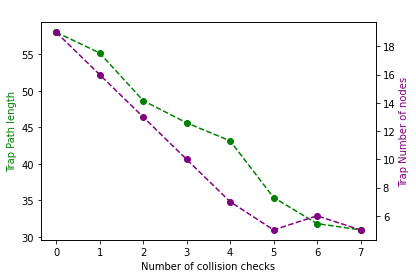

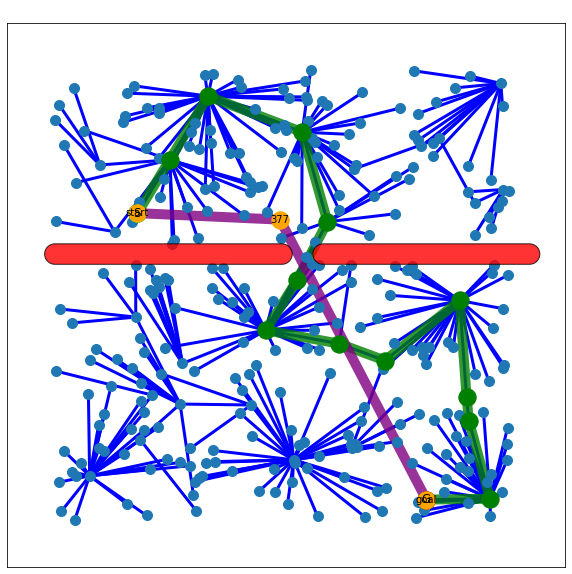

Step: 3
total steps: 1
n step: 1
n: 0
k: 3
basePRM
k_prev: 15
Centered: 125
k_next: 5
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
basePRM
k_prev: 47
Centered: 125
k_next: 150
new path creation, new path: ['start', 11, 10, 15, 47, 150, 5, 3, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
basePRM
k_prev: 11
Centered: 47
k_next: 3
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
basePRM
k_prev: 10
Centered: 47
k_next: 5
Line collides, No change
total steps: 5
n step: 3
n: 1
k: 1
basePRM
k_prev: 15
Centered: 47
k_next: 150
Line collides, No change
DelTree centered on list item 4, node: 47
DelTree line collides
Adding nodes: 400 and 377
deleting center node: 47
DelTree successful
del_tree path creation, new path: ['start', 11, 10, 15, 400, 377, 150, 5, 3, 'goal']
total steps: 6
n step: 1
n: 2
k: 3
basePRM
k_prev: start
Centered: 10
k_next: 377
new path creation, new path: ['start', 377, 150, 5, 3, 'goal']
total steps: 7
n step: 1
n: 3
k: 3
basePRM
k_prev: start
Center

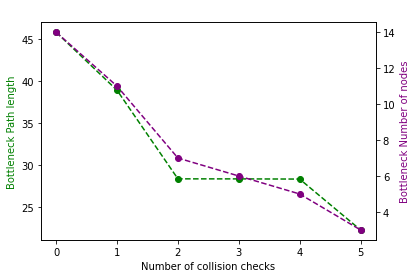

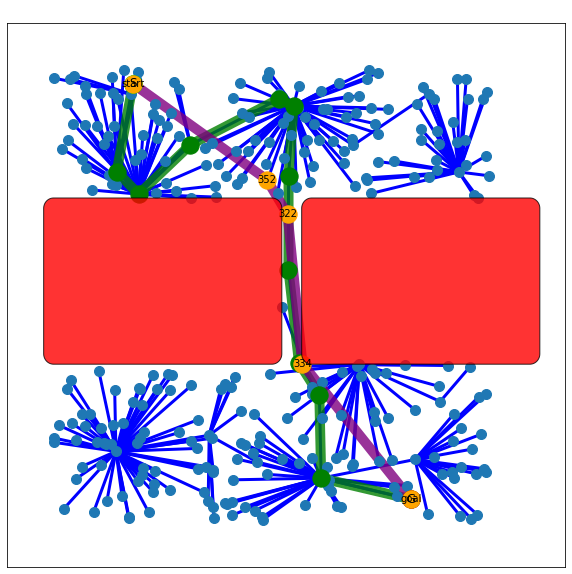

Step: 4
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
k_prev: start
Centered: 22
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
k_prev: start
Centered: 22
k_next: 12
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
k_prev: 9
Centered: 22
k_next: 0
Line collides, No change
DelTree centered on list item 2, node: 22
DelTree line collides
DelTree line collides
DelTree failed, line value smaller than epsilon
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
k_prev: start
Centered: 0
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
visibilityPRM
k_prev: 9
Centered: 0
k_next: goal
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
visibilityPRM
k_prev: 22
Centered: 0
k_next: 12
Line collides, No change
DelTree centered on list item 3, node: 0
DelTree line collides
Adding nodes: 394 and 332
deleting center node: 0
DelTree successful
del_tree path creation, new path: ['start', 9, 22, 394, 332, 12

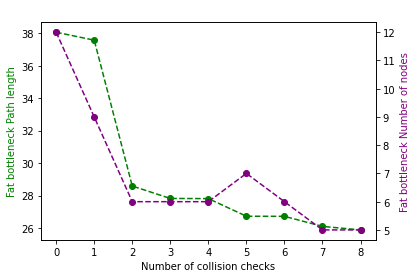

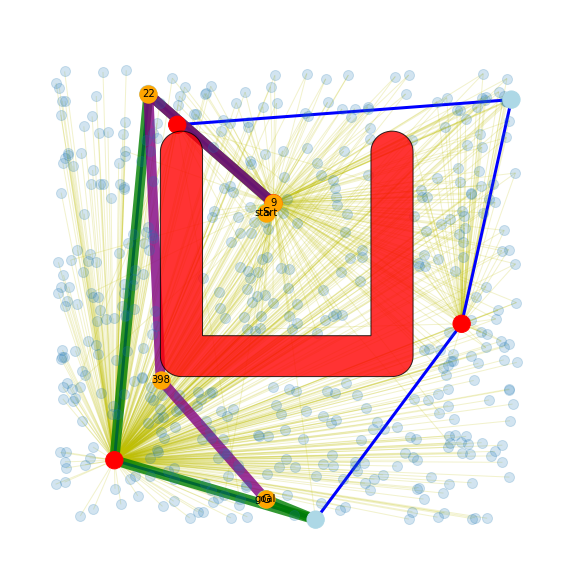

Step: 5
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
k_prev: 21
Centered: 2
k_next: goal
Line collides, No change
DelTree centered on list item 2, node: 2
Adding nodes: 333 and 374
deleting center node: 2
DelTree successful
del_tree path creation, new path: ['start', 21, 333, 374, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
k_prev: start
Centered: 374
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
visibilityPRM
k_prev: 21
Centered: 374
k_next: goal
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
visibilityPRM
k_prev: 333
Centered: 374
k_next: goal
new path creation, new path: ['start', 21, 333, 'goal']
total steps: 7
n step: 1
n: 2
k: 3
visibilityPRM
k_prev: start
Centered: 333
k_next: goal
Line collides, No c

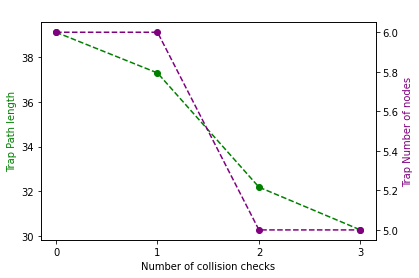

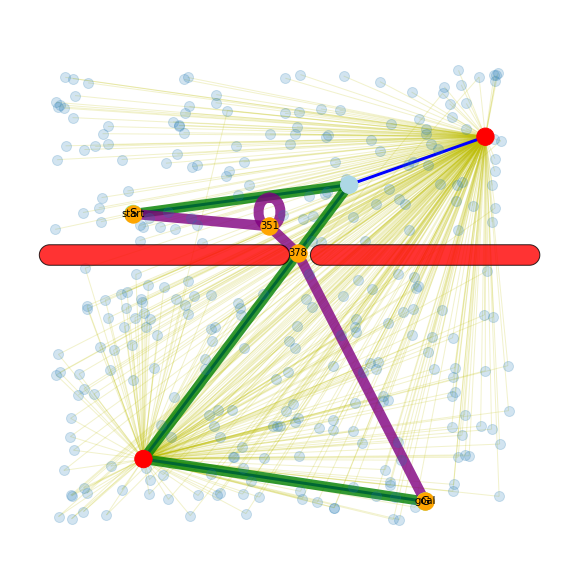

Step: 6
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
k_prev: start
Centered: 12
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
k_prev: 0
Centered: 12
k_next: 1
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
k_prev: 30
Centered: 12
k_next: 15
Line collides, No change
DelTree centered on list item 3, node: 12
DelTree line collides
Adding nodes: 390 and 363
deleting center node: 12
DelTree successful
del_tree path creation, new path: ['start', 0, 30, 390, 363, 15, 1, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
k_prev: start
Centered: 30
k_next: 15
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
visibilityPRM
k_prev: start
Centered: 30
k_next: 363
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
visibilityPRM
k_prev: 0
Centered: 30
k_next: 390
Line collides, No change
DelTree centered on list item 2, node: 30
DelTree line collides
DelTree failed, line value smaller than epsilon
total 

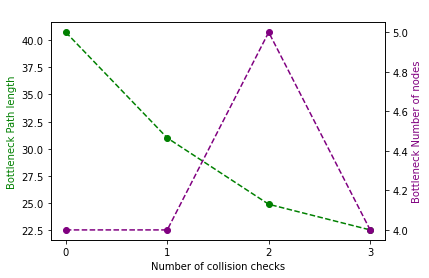

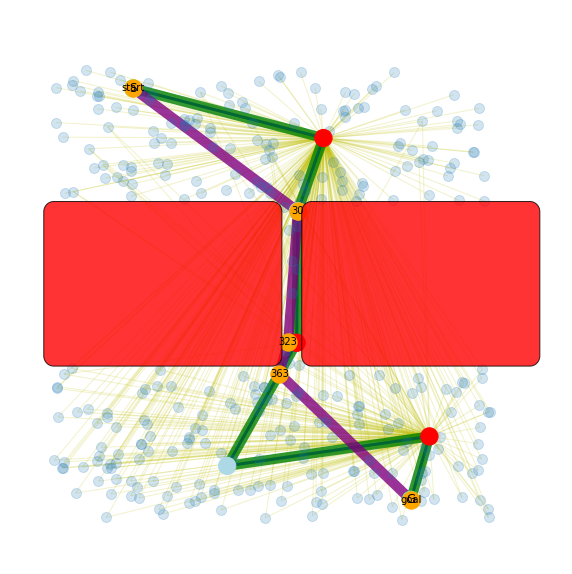

Step: 7
total steps: 1
n step: 1
n: 0
k: 3
kClosestPRM
k_prev: start
Centered: 35
k_next: 1
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
kClosestPRM
k_prev: start
Centered: 35
k_next: 7
new path creation, new path: ['start', 7, 1, 2, 3, 5, 10, 15, 16, 62, 230, 299, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
kClosestPRM
k_prev: start
Centered: 7
k_next: 3
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
kClosestPRM
k_prev: start
Centered: 7
k_next: 2
Line collides, No change
total steps: 5
n step: 3
n: 1
k: 1
kClosestPRM
k_prev: start
Centered: 7
k_next: 1
Line collides, No change
DelTree centered on list item 1, node: 7
Adding nodes: 349 and 321
deleting center node: 7
DelTree successful
del_tree path creation, new path: ['start', 349, 321, 1, 2, 3, 5, 10, 15, 16, 62, 230, 299, 'goal']
total steps: 6
n step: 1
n: 2
k: 3
kClosestPRM
k_prev: 321
Centered: 3
k_next: 15
Line collides, No change
total steps: 7
n step: 2
n: 2
k: 2
kClosestPRM
k_prev: 1
Centered: 3
k

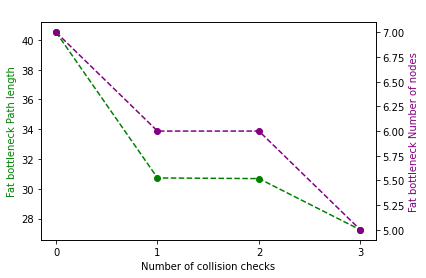

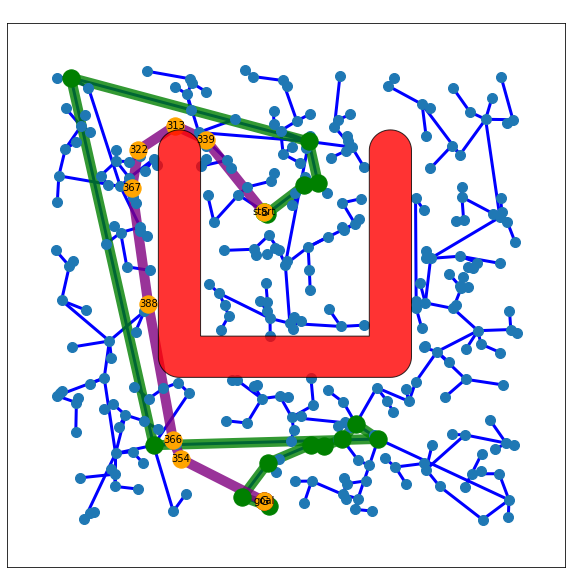

Step: 8
total steps: 1
n step: 1
n: 0
k: 3
kClosestPRM
k_prev: start
Centered: 2
k_next: 19
new path creation, new path: ['start', 19, 33, 38, 11, 1, 4, 5, 6, 16, 124, 'goal']
total steps: 2
n step: 1
n: 1
k: 3
kClosestPRM
k_prev: 11
Centered: 5
k_next: 124
new path creation, new path: ['start', 19, 33, 38, 11, 124, 'goal']
total steps: 3
n step: 1
n: 2
k: 3
kClosestPRM
k_prev: 33
Centered: 124
k_next: goal
Line collides, No change
total steps: 4
n step: 2
n: 2
k: 2
kClosestPRM
k_prev: 38
Centered: 124
k_next: goal
new path creation, new path: ['start', 19, 33, 38, 'goal']
total steps: 5
n step: 1
n: 3
k: 3
kClosestPRM
k_prev: start
Centered: 38
k_next: goal
Line collides, No change
total steps: 6
n step: 2
n: 3
k: 2
kClosestPRM
k_prev: 19
Centered: 38
k_next: goal
new path creation, new path: ['start', 19, 'goal']
total steps: 7
n step: 1
n: 4
k: 3
kClosestPRM
k_prev: start
Centered: 19
k_next: goal
Line collides, No change
total steps: 8
n step: 2
n: 4
k: 2
kClosestPRM
k_prev: start


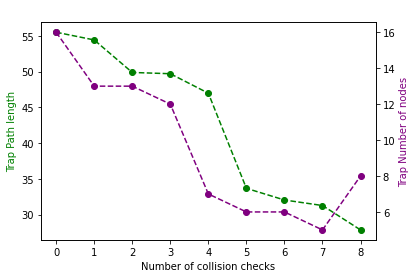

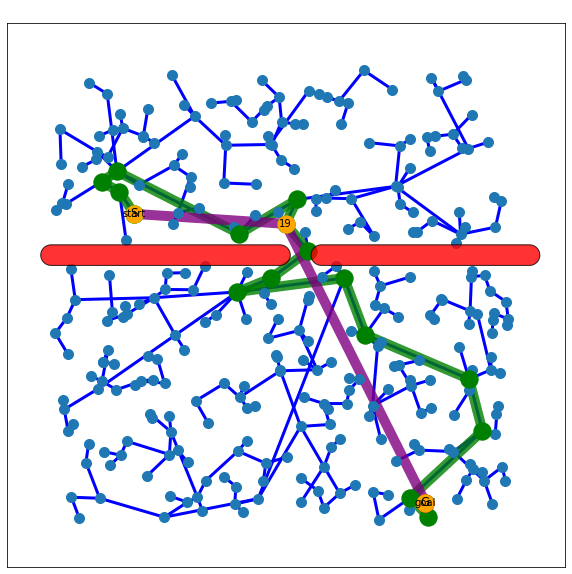

Step: 9
Step: 10
total steps: 1
n step: 1
n: 0
k: 3
RRT
k_prev: start
Centered: 13
k_next: 38
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
RRT
k_prev: 2
Centered: 13
k_next: 26
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
RRT
k_prev: 4
Centered: 13
k_next: 24
new path creation, new path: ['start', 2, 4, 24, 26, 38, 43, 47, 50, 55, 65, 70, 78, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
RRT
k_prev: 2
Centered: 26
k_next: 47
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
RRT
k_prev: 4
Centered: 26
k_next: 43
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
RRT
k_prev: 24
Centered: 26
k_next: 38
new path creation, new path: ['start', 2, 4, 24, 38, 43, 47, 50, 55, 65, 70, 78, 'goal']
total steps: 7
n step: 1
n: 2
k: 3
RRT
k_prev: 24
Centered: 47
k_next: 65
new path creation, new path: ['start', 2, 4, 24, 65, 70, 78, 'goal']
total steps: 8
n step: 1
n: 3
k: 3
RRT
k_prev: 2
Centered: 65
k_next: goal
Line collides, No change
total steps: 9


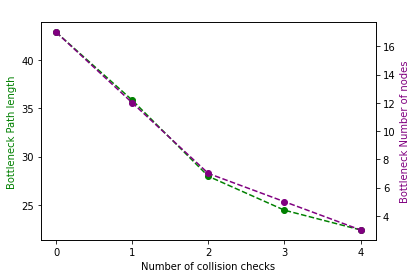

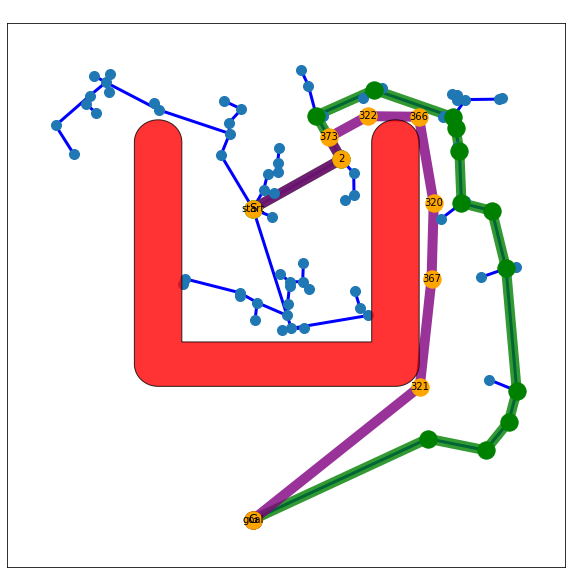

Step: 11
total steps: 1
n step: 1
n: 0
k: 3
RRT
k_prev: start
Centered: 1
k_next: 7
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
RRT
k_prev: start
Centered: 1
k_next: 5
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
RRT
k_prev: start
Centered: 1
k_next: 2
Line collides, No change
DelTree centered on list item 1, node: 1
Adding nodes: 332 and 363
deleting center node: 1
DelTree successful
del_tree path creation, new path: ['start', 332, 363, 2, 5, 7, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
RRT
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
RRT
k_prev: 332
Centered: 2
k_next: 7
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
RRT
k_prev: 363
Centered: 2
k_next: 5
Line collides, No change
DelTree centered on list item 3, node: 2
Adding nodes: 340 and 313
deleting center node: 2
DelTree successful
del_tree path creation, new path: ['start', 332, 363, 340, 313, 5, 7, 'goal']
total steps: 7
n step: 

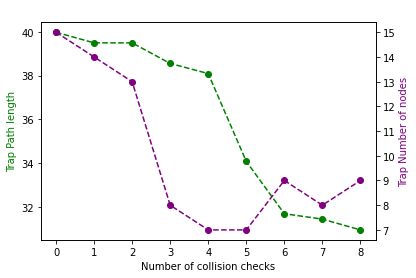

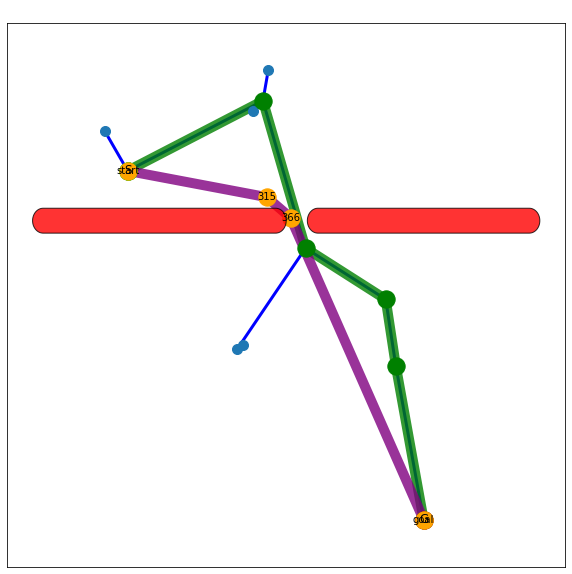

Step: 12
total steps: 1
n step: 1
n: 0
k: 3
RRT
k_prev: start
Centered: 6
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
RRT
k_prev: 1
Centered: 6
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
RRT
k_prev: 2
Centered: 6
k_next: goal
Line collides, No change
DelTree centered on list item 3, node: 6
DelTree line collides
Adding nodes: 389 and 376
deleting center node: 6
DelTree successful
del_tree path creation, new path: ['start', 1, 2, 389, 376, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
RRT
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
RRT
k_prev: start
Centered: 2
k_next: 376
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
RRT
k_prev: 1
Centered: 2
k_next: 389
new path creation, new path: ['start', 1, 389, 376, 'goal']
total steps: 7
n step: 1
n: 2
k: 3
RRT
k_prev: start
Centered: 376
k_next: goal
Line collides, No change
total steps: 8
n step: 2
n: 2
k: 2
RRT
k_prev: 

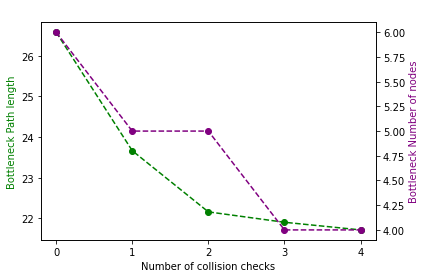

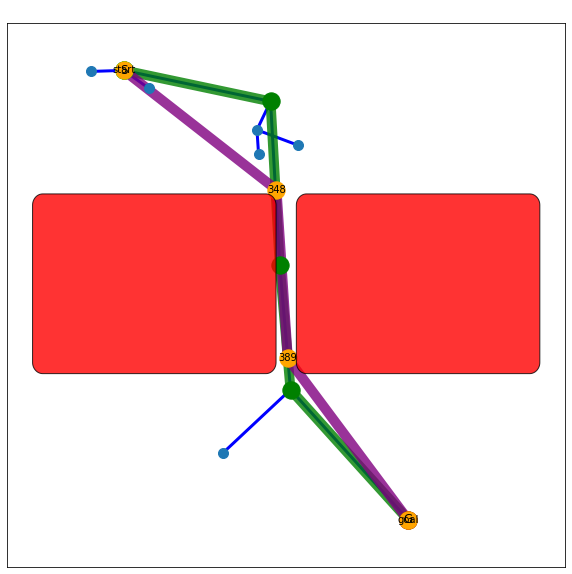

Step: 13
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
k_prev: 19
Centered: 36
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
k_prev: 22
Centered: 36
k_next: goal
new path creation, new path: ['start', 1, 3, 4, 5, 7, 19, 22, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
simpleRRT
k_prev: 4
Centered: 19
k_next: goal
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
simpleRRT
k_prev: 5
Centered: 19
k_next: goal
Line collides, No change
total steps: 5
n step: 3
n: 1
k: 1
simpleRRT
k_prev: 7
Centered: 19
k_next: 22
new path creation, new path: ['start', 1, 3, 4, 5, 7, 22, 'goal']
total steps: 6
n step: 1
n: 2
k: 3
simpleRRT
k_prev: 1
Centered: 5
k_next: goal
Line collides, No change
total steps: 7
n step: 2
n: 2
k: 2
simpleRRT
k_prev: 3
Centered: 5
k_next: 22
Line collides, No change
total steps: 8
n step: 3
n: 2
k: 1
simpleRRT
k_prev: 4
Centered: 5
k_next: 7
new path creation, new path: ['start', 1, 3, 4, 7, 22, 'goal']
total steps: 9
n step: 1
n:

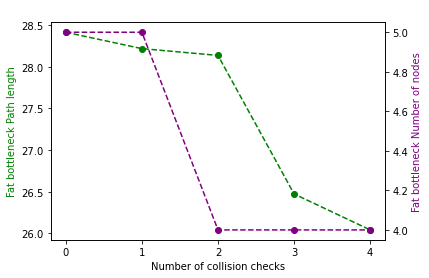

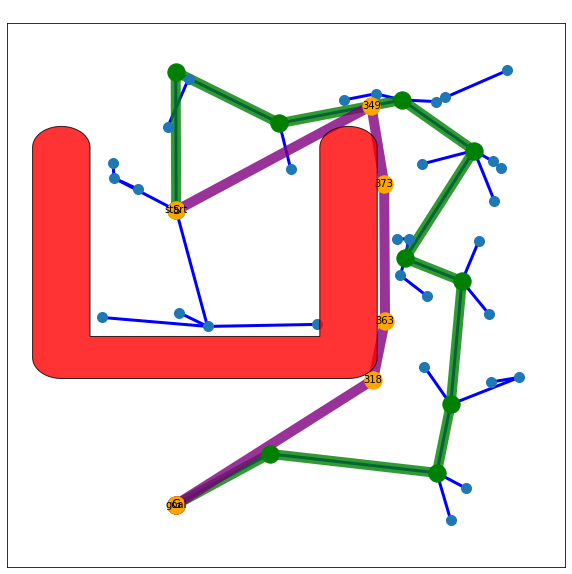

Step: 14
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
k_prev: start
Centered: 2
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
simpleRRT
k_prev: 1
Centered: 2
k_next: 5
new path creation, new path: ['start', 1, 5, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
simpleRRT
k_prev: start
Centered: 1
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
simpleRRT
k_prev: start
Centered: 1
k_next: goal
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
simpleRRT
k_prev: start
Centered: 1
k_next: 5
Line collides, No change
DelTree centered on list item 1, node: 1
DelTree line collides
Adding nodes: 370 and 336
deleting center node: 1
DelTree successful
del_tree path creation, new path: ['start', 370, 336, 5, 'goal']
total steps: 7
n step: 1
n: 2
k: 3
simpleRRT
k_prev: start
Centered: 5
k_next: goal
Line collides, No change
total steps: 

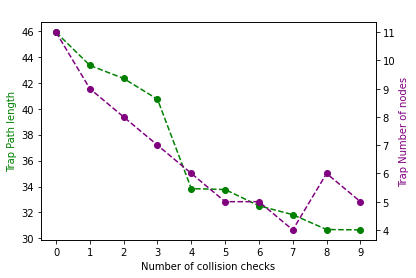

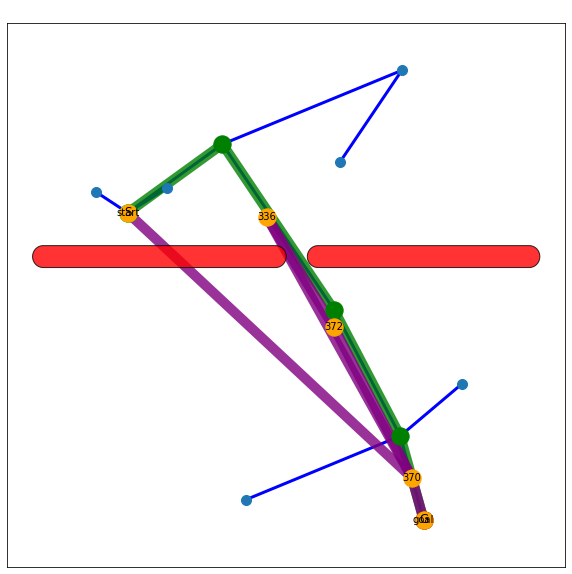

Step: 15
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
k_prev: start
Centered: 1
k_next: 74
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
k_prev: start
Centered: 1
k_next: 9
new path creation, new path: ['start', 9, 74, 77, 78, 101, 105, 107, 'goal']
total steps: 3
n step: 1
n: 1
k: 3
simpleRRT
k_prev: 74
Centered: 101
k_next: goal
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
simpleRRT
k_prev: 77
Centered: 101
k_next: 107
Line collides, No change
total steps: 5
n step: 3
n: 1
k: 1
simpleRRT
k_prev: 78
Centered: 101
k_next: 105
new path creation, new path: ['start', 9, 74, 77, 78, 105, 107, 'goal']
total steps: 6
n step: 1
n: 2
k: 3
simpleRRT
k_prev: start
Centered: 74
k_next: 105
Line collides, No change
total steps: 7
n step: 2
n: 2
k: 2
simpleRRT
k_prev: start
Centered: 74
k_next: 78
Line collides, No change
total steps: 8
n step: 3
n: 2
k: 1
simpleRRT
k_prev: 9
Centered: 74
k_next: 77
new path creation, new path: ['start', 9, 77, 78, 105, 107, '

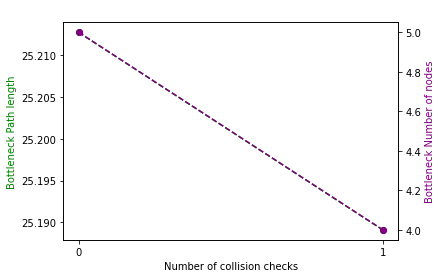

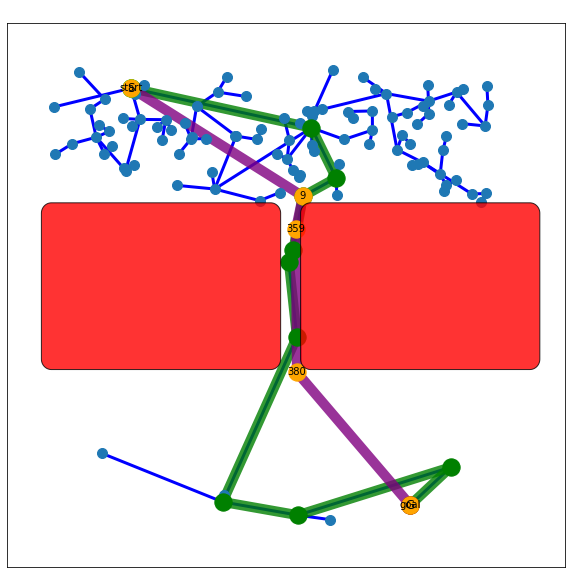

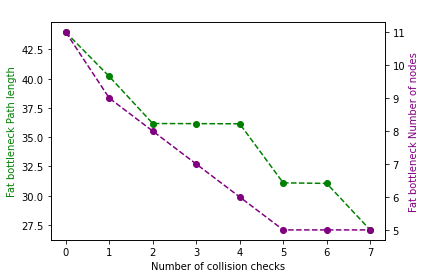

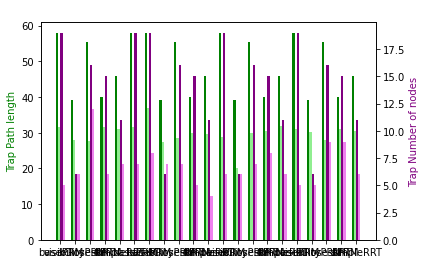

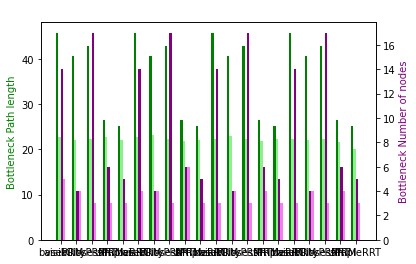

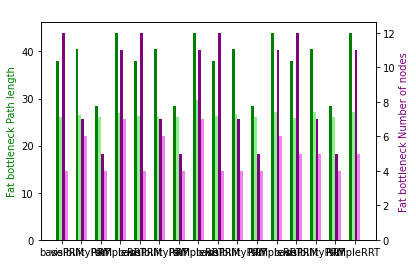

In [35]:
from IPSmoothing import IPSmoothing
k = 3 # Parameter for smoothing
eps = 1 # Cancel threshold for DelTree
debug_counter = 0

for result in resultList:
    debug_counter += 1
    print(f"Step: {debug_counter}")

    smoother = IPSmoothing(result, plannerFactory)

    smoothed_graph = smoother.smooth_solution(k, eps)

    if smoothed_graph is not None:
        smoother.visualize_path(plannerFactory, smoothed_graph, debug_counter)
        smoother.draw_statistics()

    # break

IPSmoothing.draw_comparison(IPTestSuite.benchList[0:3])



    

In [23]:
print(IPSmoothing.statistics)

[]
